## Benzene

One of the most ubiquitous molecules in organic chemistry is benzene. Due to its common representation, where it appears to contain three double bonds, we would expect benzene to behave like an alkene. However, unlike an alkene, benzene is reluctant to undergo addition reactions. This, as well as the regular hexagonal shape and planar configuration of benzene, can be explained by calculating and observing the molecular orbitals of benzene.

```{image} ../images/benzene.jpg
:alt: Benzene
:width: 150px
:align: center
```

The π molecular orbitals of benzene are constructed from different combinations of constructive and destructive overlap of six carbon 2p orbitals. In order to calculate the approximate energies and coefficients of the four molecular orbitals, we can set up a matrix. α represents the energy to remove an electron from the carbon 2p orbitals, β represents the resonance integral between two adjacent carbon atoms. Both α and β are negative values.

$$
H=\begin{pmatrix}
α & β & 0 & 0 & 0 & β\\
β & α & β & 0 & 0 & 0\\
0 & β & α & β & 0 & 0\\
0 & 0 & β & α & β & 0\\
0 & 0 & 0 & β & α & β\\
β & 0 & 0 & 0 & β & α
\end{pmatrix}
$$

This can be rewritten as:

$$
H=α1+β\begin{pmatrix}
0 & 1 & 0 & 0 & 0 & 1\\
1 & 0 & 1 & 0 & 0 & 0\\
0 & 1 & 0 & 1 & 0 & 0\\
0 & 0 & 1 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 1\\
1 & 0 & 0 & 0 & 1 & 0
\end{pmatrix}
$$

To calculate the energy of each molecular orbital in terms of α and β, we can calculate the eigenvalues. The matrix of coefficients can be calculated by finding the eigenvectors, where each column gives the coefficients of each atomic orbital for the corresponding molecular orbital. Using this information, I built a python program that can output the energies and coefficients of conjugated π molecular orbitals from a given matrix, benzene is shown below.

In [10]:
#Program to output Hückel coefficients
import numpy as np
import numpy.linalg

atoms = 6
# Matrix
val = [[0,1,0,0,0,1],[1,0,1,0,0,0],[0,1,0,1,0,0],[0,0,1,0,1,0],[0,0,0,1,0,1],[1,0,0,0,1,0]]
matrix = np.matrix(val)  
energy, eigvec = numpy.linalg.eig(matrix)
eigvec = eigvec.tolist()

# Creating an empty list for the coe
coefficient = [0] * atoms
for x in range (atoms):
    coefficient[x] = [0] * atoms 
for i in range (0,atoms):
    for j in range (0,atoms):
        coefficient[i][j] = eigvec[j][i]
coefficient = np.matrix(coefficient)

print('Energies:',energy)
print('Coefficients:', coefficient)

Energies: [-2. -1.  2. -1.  1.  1.]
Coefficients: [[ 0.40824829 -0.40824829  0.40824829 -0.40824829  0.40824829 -0.40824829]
 [-0.57735027  0.28867513  0.28867513 -0.57735027  0.28867513  0.28867513]
 [ 0.40824829  0.40824829  0.40824829  0.40824829  0.40824829  0.40824829]
 [-0.01992069 -0.48974194  0.50966263 -0.01992069 -0.48974194  0.50966263]
 [ 0.57735027  0.28867513 -0.28867513 -0.57735027 -0.28867513  0.28867513]
 [ 0.11404433 -0.4331262  -0.54717053 -0.11404433  0.4331262   0.54717053]]


The following molecular orbitals are defined[<sup>1</sup>](#fn1):

$$
E_1= α+2β , ψ_1=0.41χ_1+0.41χ_2+0.41χ_3+0.41χ_4+0.41χ_5+0.41χ_6
$$
$$
E_2= α+1β,ψ_2=0.11χ_1-0.43χ_2-0.55χ_3-0.11χ_4+0.43χ_5+0.54χ_6
$$
$$
E_3= α+1β,ψ_3=0.58χ_1+0.29χ_2-0.29χ_3-0.57χ_4-0.29χ_5+0.29χ_6
$$
$$
E_4= α-1.54 β 	ψ_4=-0.42χ_1+0.65χ_2-0.58χ_3+0.25χ_4+0.41χ_5+0.41χ_6
$$

To output 3D graphs of these molecular orbitals, I used my earlier program for displaying atomic orbitals and adapted it to display the linear combination of six 2p orbitals, with the calculated coefficient applied to each atomic orbital, a set distance apart. The same process is performed to find and display the region of 90% probability. The skeletal framework of sigma bonds is also represented. My code for displaying the molecular orbitals, as well as the returned plots, is below. Each molecular orbital is shown from two angles.

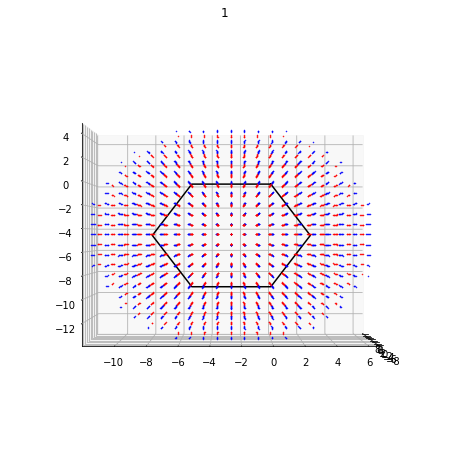

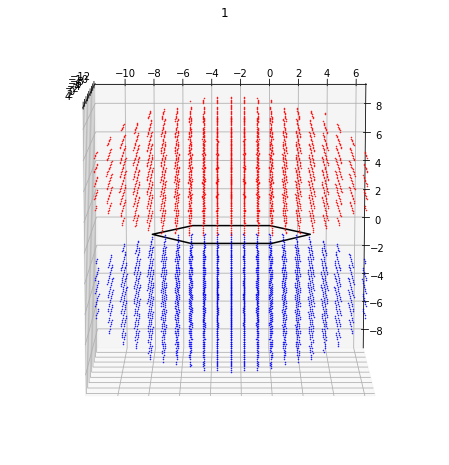

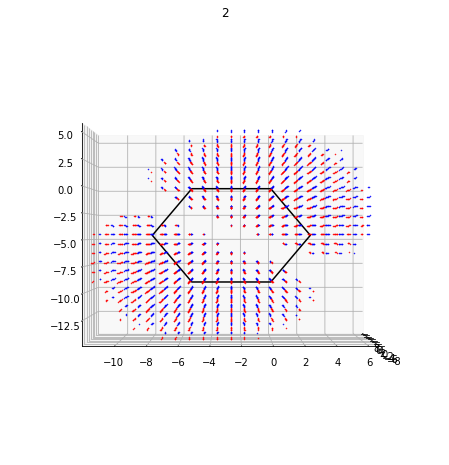

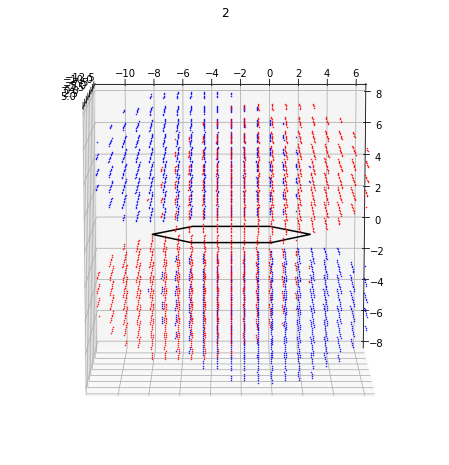

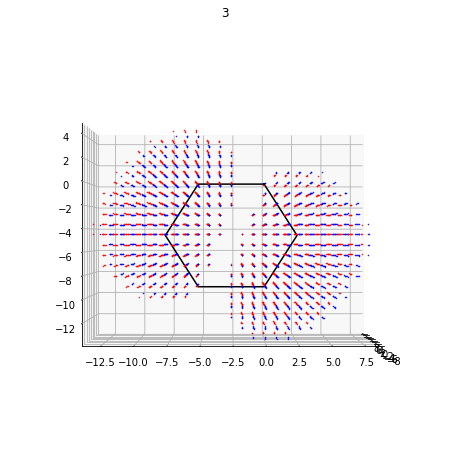

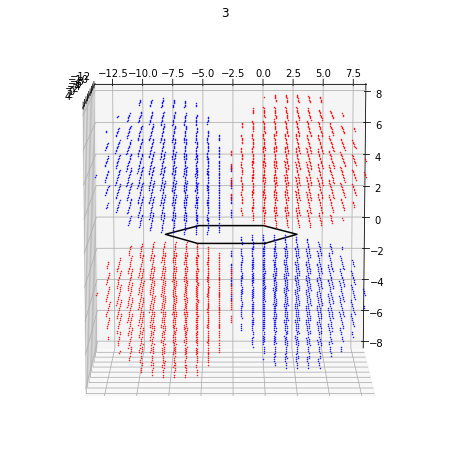

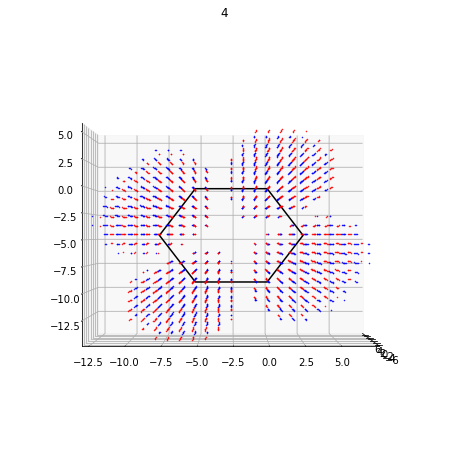

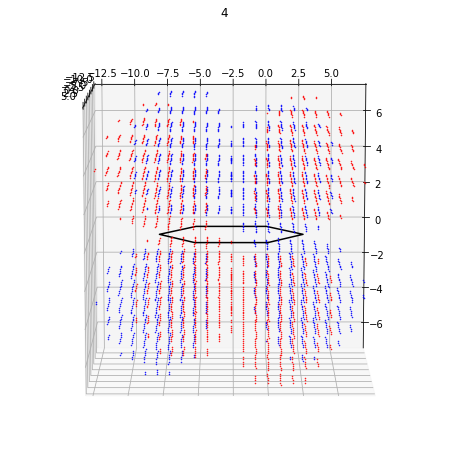

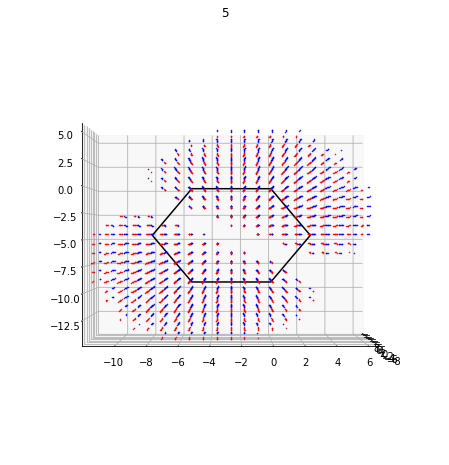

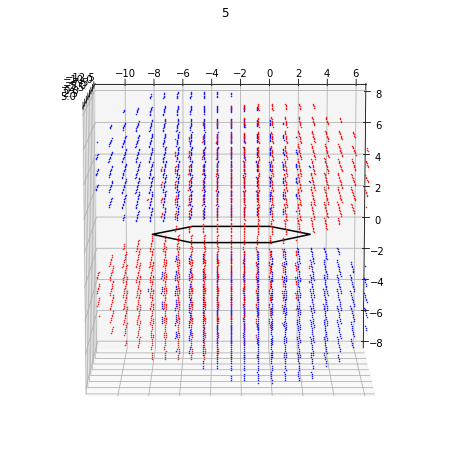

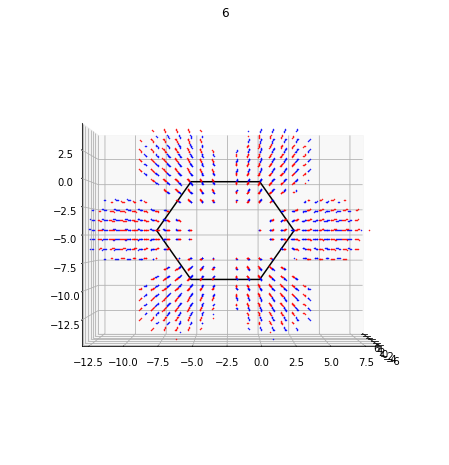

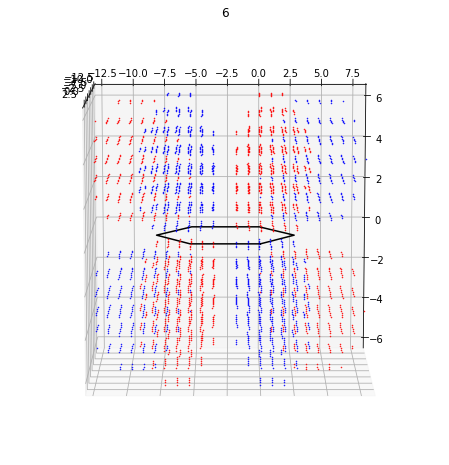

In [13]:
# Benzene - 90% Plot

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from scipy.special import sph_harm
import math
%matplotlib inline

n = 1
l = 0
m = 0
Z = 1

# Constants
na = 6.02*np.power(10, 23)
h = 6.63/np.power(10, 34)
c = 3*np.power(10, 8)
    
# Value of beta in jmol-1
beta_si = 230000
# Value of beta per molecule
beta = beta_si/na


# Radial distribution function
def  radial_distribution(r, n, l, Z_eff):
    rho = 2.0 * Z_eff * r / n    
    p = Z*r
    if n == 1  and l == 0 :
        return 2*(Z**1.5)*np.exp(-p)
    elif n == 2  and l == 0 :
         return ((Z/2)**1.5)*(2-p)*np.exp(-p/2)
    elif n == 2  and l == 1:
         return (1/(np.sqrt(3))*((Z/2)**1.5)*p*np.exp(-p/2))
    elif n == 3  and l == 0 :
         return (2/27)*((Z/3)**1.5)*(27-18*p+2*(p**2))*np.exp(-p/3)
    elif n == 3 and l == 1 :
         return (1/27)*((2*Z/3)**1.5)*p*(6-p)*np.exp(-p/3)
    elif n == 3  and l == 2 :
         return (4/(27*np.sqrt(10)))*((Z/3)**1.5)*(p**2)*np.exp(-p/3)

def  spherical_harmonics (theta, phi, l, m):
    if l == 0 :
        if m == 0 :
             # l = 0, m = 0 
            return np.sqrt ( 1.0 / ( 4 * np.pi))
    elif l == 1 :
         if m == 0 :
             # l = 1, m = 0 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.cos ( theta)
         if m == 1 :
             # l = 1, m = + 1 
            return np.sqrt (3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.cos (phi)
         if m ==- 1 :
             # l = 1, m = + 1 
            return np.sqrt ( 3.0 / ( 4.0 * np.pi)) * np.sin (theta) * np.sin (phi)
    else:
         if m == 0 :
            return np.sqrt ( 5.0 / ( 16.0 * np.pi)) * ( 3.0 * (np.cos (theta) ** 2 ) -1.0 )
         if m == 1 :
            return np.sqrt ( 15.0 )/ ( 4.0 * np.pi) * np.cos (theta) * np.sin (theta) * np.cos (phi)
         if m ==- 1 :
            return np.sqrt ( 15.0 / ( 4.0 * np.pi )) * np.cos (theta) * np.sin (theta) * np.sin (phi)
         if m == 2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin ( theta) ** 2 ) * np.cos ( 2 * phi)
         if m == --2 :
            return np.sqrt ( 15.0 / ( 16.0 * np.pi)) * (np.sin (theta) ** 2) * np.sin ( 2 * phi)

def f(x, y, z, n, l, m, Z_eff): 
        #Convert cartesian coordinate system to polar 
        r = np.sqrt (x * x + y * y + z * z)
        Z = 6-( 0.35 * 3 + 0.85 * 2 )
        theta = 0.0 
        phi = 0.0 
        if r> 0 :
            theta = np.arccos (z / r)
        if y == 0 :
             if x < 0 :
                phi = np.pi
        elif x * x + y * y> 0 :
            phi = np.sign (y) * np.arccos (x / np.sqrt (x * x + y * y))

        # Return the wavefunction of the orbital
        return (radial_distribution(r, n, l, Z_eff) * spherical_harmonics(theta, phi, l, m))

def benzene(x, y, z, n, l, m, Z_eff):
    # Quantum numbers - Hydrogen 1s
    n = 2
    l = 1
    m = 1
    Z = 6-(0.35*3 + 0.85*2)
    # Distance between atoms
    d_1 = (140.0 / 52.9)*2
    c = [
    [ 0.40824829,  0.40824829,  0.40824829,  0.40824829,  0.40824829,  0.40824829],
    [ 0.57735027,  0.28867513, -0.28867513, -0.57735027, -0.28867513,  0.28867513],
    [ 0.11404433, -0.4331262,  -0.54717053, -0.11404433,  0.4331262,   0.54717053],
    [-0.57735027,  0.28867513,  0.28867513, -0.57735027,  0.28867513,  0.28867513] ,
    [ 0.57735027,  0.28867513, -0.28867513, -0.57735027, -0.28867513,  0.28867513],
    [ 0.40824829, -0.40824829,  0.40824829, -0.40824829,  0.40824829, -0.40824829]
    ]
    
    #centre = [[(-d_2-(d_1/2)), 0], [(-d_1/2), 0], [(d_1/2), 0], [(d_2+(d_1/2)), 0]]
    centre = [[0,0],[d_1,0],[1.5*d_1,np.sqrt(3)*d_1/2],[d_1,d_1*np.sqrt(3)],[0,d_1*np.sqrt(3)],[-0.5*d_1,d_1*np.sqrt(3)/2]]
    total = 0
    for i in range(6):
        total = total + c[orbital][i]*f(x, y+centre[i][0], z+centre[i][1], n, l, m, Z)
    return total


for orbital in range (6):
    
    # Lists for positive data
    x_pos_list = []
    y_pos_list = []
    z_pos_list = []

    # Lists for negative data
    x_neg_list = []
    y_neg_list = []
    z_neg_list = []

    data = []

    N = 40
    spread = 18
    space = 2*spread/N
    prob = 0.0

    for i in range (N):
        for j in range (N):
            for k in range (N):   
                x = i*space-spread
                y = j*space-spread
                z = k*space-spread
                f_1 = benzene(x, y, z, n, l, m, Z)
                # Probability distribution function
                f_2 = f_1**2
                data.append([f_2,x,y,z,f_1])
                prob = prob+f_2*space**3
    data = sorted(data, key =lambda data: data[0], reverse=True)
    total = 0.0
    i = 0
    while total<0.9*prob:
        x = data[i][1]
        y = data[i][2]
        z = data[i][3]
        total = total+(data[i][0])*space**3
        if data[i][4] >0:
            x_pos_list.append (x)
            y_pos_list.append (y)
            z_pos_list.append (z)
        else:
            x_neg_list.append (x)
            y_neg_list.append (y)
            z_neg_list.append (z) 
        i = i+1


    # Positive values
    Xpos = np.array (x_pos_list)
    Ypos = np.array (y_pos_list)
    Zpos = np.array (z_pos_list)

    # Negative values
    Xneg = np.array (x_neg_list)
    Yneg = np.array (y_neg_list)
    Zneg = np.array (z_neg_list)

    
    for o in range(2):
        fig = plt.figure (figsize = ( 8.0 , 8.0 ))
        ax = fig.add_subplot ( 1 , 1 , 1 , projection = '3d' )
        
        # Plotting the sigma framework
        d_1 = (140.0 / 52.9)*2
        centre = [[0,0],[d_1,0],[1.5*d_1,np.sqrt(3)*d_1/2],[d_1,d_1*np.sqrt(3)],[0,d_1*np.sqrt(3)],[-0.5*d_1,d_1*np.sqrt(3)/2]]
        x = []
        y = []
        z = []
        for i in range(6):
            x.append(0)
            y.append(-centre[i][0])
            z.append(-centre[i][1])
        x.append(0)
        y.append(centre[0][0])
        z.append(centre[0][1])
        ax.plot3D(x, y, z, 'black')

        # Finding the max and min values for each axis in order to scale the axes
        ymin = min(min(Ypos), min(Yneg))
        ymax = max(max(Ypos), max(Yneg))
        zmin = min(min(Zpos), min(Zneg))
        zmax = max(max(Zpos), max(Zneg))

        ax.set_xlim3d (max(max(Xpos), max(Xneg)), min(min(Xpos), min(Xneg)))
        ax.set_ylim3d (ymin, ymax)
        ax.set_zlim3d (zmin, zmax)
        ax.title.set_text("{}".format(orbital+1, 'π'))

        # Plot negative values in blue
        ax.plot(Xneg, Yneg, Zneg, color = 'b' , marker = "o", markersize=0.5, linestyle = 'None' )

        # Plot positive values in red
        ax.plot(Xpos, Ypos, Zpos, color = 'r' , marker = "o", markersize=0.5, linestyle = 'None' )
        
        if o == 0:
            ax.view_init(0, 0)
        else:
            ax.view_init(100, 0)
        plt.show()
    

### Planar configuration and shape

If benzene really did contain alternating C=C double and C-C single bonds, we would expect the double bonds to be shorter than the single bonds, and for benzene to have an irregular shape. However, this is not the case, benzene is in fact a regular hexagon. As shown by the molecular orbital plots, benzene has evenly distributed π electron density across the whole ring, indicating that each bond has the same strength and therefore length. A planar configuration is the only way in which the carbon 2p orbitals can overlap sideways and delocalise. 

### Reluctance to undergo addition reactions

From the calculated energy levels, we can find the delocalisation energy of benzene: the difference in energy of a conjugated system compared with a set of localised π bonds. In order to calculate the delocalization energy of benzene, we must first imagine a hypothetical unconjugated version of benzene: 1,3,5-cyclohexatriene. This hypothetical molecule contains three π bonds, each containing 2 electrons. The energy of each electron is α + β   therefore the π electron energy of this molecule is 6α + 6β.

The conjugated system in benzene contains six electrons, one from each carbon atom. Therefore, the three lowest energy π molecular orbitals are filled. The total energy of the conjugated system is 6α + 8β. By subtracting the π electron energy of the hypothetical 1,3,5-cyclohexatriene from the π electron energy of benzene gives us 2β, the delocalization energy of benzene. This tells us that benzene is 2β lower in energy than 1,3,5-cyclohexatriene, and is more stable as a result. Addition reactions disrupt the delocalization of the π system, decreasing the delocalization energy and the stability of the molecule. Hence, benzene tends to undergo electrophilic substitution reactions, which leave the conjugated system intact, rather than addition reactions.

<span id="fn1">1: Interestingly, these energy levels lie in the shape of a hexagon, the same shape as benzene. This same phenomenon is observed for every aromatic ring. </span>